## Behind the Scenes with Coursera: My Journey Analyzing Online Education Trends

As a Data Scientist, Coursera's data offers a compelling view into learning trends, spotlighting Python, AI, and Data Science as pivotal fields. My analysis confirms their growing dominance, underlining a shift towards a tech-centric future. It's clear these are the tools shaping tomorrow, and through Coursera, learners worldwide are seizing the opportunity to craft the digital landscape. It's an exciting time to be part of this knowledge evolution

## Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud

## Importing the data

In [ ]:
# Load the CSV file into a DataFrame
file_path = '/content/coursera_courses.csv'
coursera_courses_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
coursera_courses_df.head()

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,492,Beginner,https://www.coursera.org/specializations/sscp-...,"6,958","['Risk Management', 'Access Control', 'Asset',...",[],Pursue better IT security job opportunities an...
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,51,Intermediate,https://www.coursera.org/specializations/dot-n...,"2,531","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,62,Beginner,https://www.coursera.org/learn/21st-century-en...,"4,377",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,517,Intermediate,https://www.coursera.org/learn/crash-course-in...,"39,004","['Instrumental Variable', 'Propensity Score Ma...",[],We have all heard the phrase “correlation does...
4,A life with ADHD,University of Geneva,Course,1 - 3 Months,NaN,NaN,Beginner,https://www.coursera.org/learn/life-with-adhd,NaN,"['differential diagnosis and comorbidities', '...",[' Understand what ADHD is and the challenges ...,What is ADHD and what are the challenges that ...


In [ ]:
coursera_courses_df.isnull().sum()

course_title                 0
course_organization          0
course_certificate_type      0
course_time                  0
course_rating                6
course_reviews_num           6
course_difficulty            0
course_url                   0
course_students_enrolled    41
course_skills                0
course_summary               0
course_description           1
dtype: int64

## Visualization of Course enrollment and Course rating

In [ ]:
# Data Cleaning
# Drop rows with missing 'course_rating', 'course_reviews_num', and 'course_description'
coursera_courses_cleaned_df = coursera_courses_df.dropna(subset=['course_rating', 'course_reviews_num', 'course_description'])

# Convert 'course_students_enrolled' to numerical format
coursera_courses_cleaned_df['course_students_enrolled'] = coursera_courses_cleaned_df['course_students_enrolled'].str.replace(',', '').astype(float)

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Bar Plot of Course Enrollments', 'Violin Plot of Course Enrollments'))

# Add a bar plot to the first column
bar_trace = go.Histogram(x=coursera_courses_cleaned_df['course_students_enrolled'])
fig.add_trace(bar_trace, row=1, col=1)

# Add a violin plot to the second column
violin_trace = go.Violin(y=coursera_courses_cleaned_df['course_students_enrolled'], box_visible=True, points='all')
fig.add_trace(violin_trace, row=1, col=2)

# Update layout
fig.update_layout(title_text="Distribution of Course Enrollments", showlegend=False)
fig.update_xaxes(title_text='Number of Students Enrolled', row=1, col=1)
fig.update_xaxes(title_text='Number of Students Enrolled', row=1, col=2)
fig.update_yaxes(title_text='Number of Courses', row=1, col=1)
fig.update_yaxes(title_text='Number of Courses', row=1, col=2)

# Show the plots
fig.show()

<ipython-input-20-6cf2c8b962e9>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The histogram depicts a majority of Coursera courses with high ratings, primarily clustered between 4.5 to 5.0, suggesting a positive reception from learners.

**Takeaway:** As a learner, you can expect a quality educational experience on Coursera, especially with courses rated close to 5.0. For educators, the focus should be on sustaining the high quality that earns such favorable ratings

In [ ]:
# Convert 'course_rating' and 'course_reviews_num' to numeric for analysis
coursera_courses_cleaned_df['course_rating'] = pd.to_numeric(coursera_courses_cleaned_df['course_rating'])
coursera_courses_cleaned_df['course_reviews_num'] = pd.to_numeric(coursera_courses_cleaned_df['course_reviews_num'], errors='coerce')

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Bar Plot of Course Ratings', 'Violin Plot of Course Ratings'))

# Add a bar plot to the first column for 'course_rating'
fig.add_trace(
    go.Histogram(x=coursera_courses_cleaned_df['course_rating'], nbinsx=15),
    row=1, col=1
)

# Add a violin plot to the second column for 'course_rating'
fig.add_trace(
    go.Violin(y=coursera_courses_cleaned_df['course_rating'], box_visible=True, points='all'),
    row=1, col=2
)

# Update layout
fig.update_layout(title_text="Distribution of Course Ratings", showlegend=False)
fig.update_xaxes(title_text='Course Rating', row=1, col=1)
fig.update_yaxes(title_text='Number of Courses', row=1, col=1)
fig.update_xaxes(title_text='Course Rating', row=1, col=2)

# Show the plots
fig.show()

<ipython-input-21-2e2b80538aae>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-2e2b80538aae>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Insights:** The histogram depicts a majority of Coursera courses with high ratings, primarily clustered between 4.5 to 5.0, suggesting a positive reception from learners.

**Takeaway:** As a learner, you can expect a quality educational experience on Coursera, especially with courses rated close to 5.0. For educators, the focus should be on sustaining the high quality that earns such favorable ratings

## Visualization of Course difficulty, Certificate type and top 10 organizations

In [ ]:
# Create subplots for each analysis
fig = make_subplots(rows=1, cols=3, subplot_titles=('Course Difficulty Level Distribution', 'Certificate Type Distribution', 'Top 10 Organizations Offering Courses'))

# Difficulty Level Distribution
difficulty_counts = coursera_courses_cleaned_df['course_difficulty'].value_counts()
fig.add_trace(go.Bar(x=difficulty_counts.index, y=difficulty_counts.values), row=1, col=1)

# Certificate Type Distribution
certificate_type_counts = coursera_courses_cleaned_df['course_certificate_type'].value_counts()
fig.add_trace(go.Bar(x=certificate_type_counts.index, y=certificate_type_counts.values), row=1, col=2)

# Top Organizations Offering Courses
organization_counts = coursera_courses_cleaned_df['course_organization'].value_counts().head(10)
fig.add_trace(go.Bar(x=organization_counts.index, y=organization_counts.values), row=1, col=3)

# Update layout
fig.update_layout(showlegend=False, title_text="Coursera Course Analysis", barmode='group')
fig.show()

The provided plot presents a comparative analysis across three different aspects of Coursera courses: difficulty level, certificate type, and the organizations offering the courses.

**Explanation:**
- The first bar chart shows a significant leaning towards courses classified as 'Beginner', indicating Coursera's strong emphasis on accessibility for those new to a subject.
- The second bar chart reveals that 'Course' and 'Specialization' certificates are most common, which suggests a flexible approach to learning, from single classes to more comprehensive program offerings.
- The third bar chart highlights that IBM and Google are the top providers, suggesting their courses are likely to be aligned with industry-relevant skills and knowledge.

**Takeaway:** As an eager learner, this tells me that Coursera is an excellent starting point to dive into new fields, with a vast array of foundational courses. For someone looking to upskill quickly, the high volume of comprehensive specializations offered, especially by leading tech giants, could be particularly beneficial.

## Word cloud of all Coursera skills

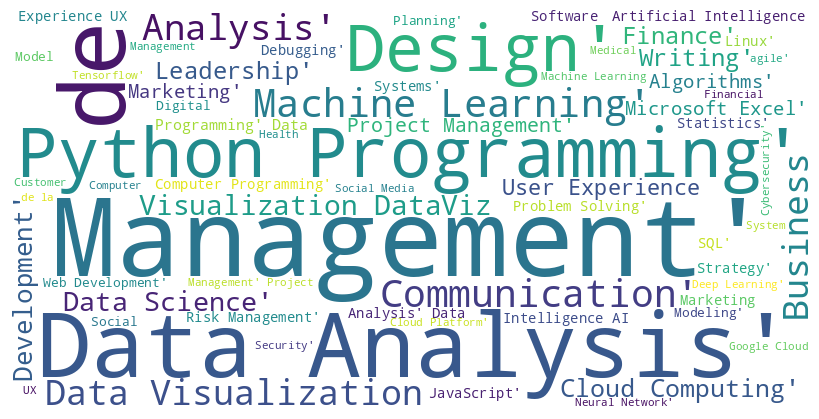

In [ ]:
# Combine all text in the course_skills column
all_skills_text = ' '.join(coursera_courses_cleaned_df['course_skills'].astype(str))

# Create a word cloud for course_skills
wordcloud_skills = WordCloud(width = 800, height = 400,
                             background_color ='white',
                             min_font_size = 10).generate(all_skills_text)

# Plot the WordCloud for course_skills
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_skills)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Insights:** The word cloud highlights a focus on "Data Analysis," "Machine Learning," "Programming," and "Development," showing the demand for technical skills in data handling and software creation.

**Takeaways:** For anyone looking to enhance their career, honing skills in data science and software development is key. These areas are evidently crucial in the current technology-driven landscape.

## Word cloud of Cousera skills for top 10 courses

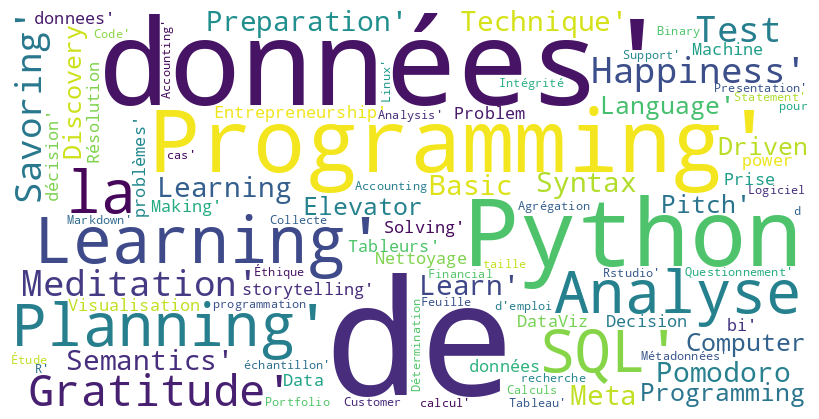

In [ ]:
top_courses = coursera_courses_cleaned_df[['course_title', 'course_students_enrolled', 'course_skills']].sort_values(by='course_students_enrolled', ascending=False).head(10)

# Combine all text in the course_skills column
all_skills_text = ' '.join(top_courses['course_skills'].astype(str))

# Create a word cloud for course_skills
wordcloud_skills = WordCloud(width = 800, height = 400,
                             background_color ='white',
                             min_font_size = 10).generate(all_skills_text)

# Plot the WordCloud for course_skills
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_skills)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Insights:** This word cloud emphasizes "Programming," "Python," "Learning," and "Data," pointing towards the significance of programming languages and data skills in the tech sector.

**Takeaways:** For professionals and students, gaining proficiency in Python and a deep understanding of data handling is crucial. These skills are foundational for various roles in technology, especially in data analysis and software development

## Word cloud of Cousera summary keywords for all the courses

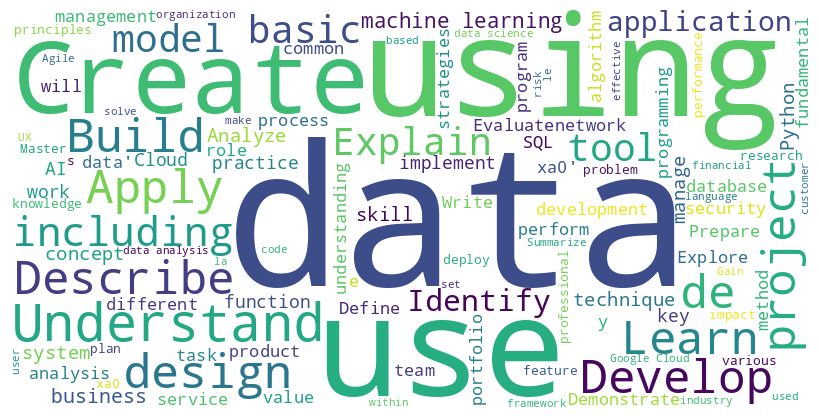

In [ ]:
# Assuming you have your DataFrame as coursera_courses_cleaned_df
# Combine all text in the course_summary column
all_summary_text = ' '.join(coursera_courses_cleaned_df['course_summary'].astype(str))

# Create a word cloud for course_summary
wordcloud_summary = WordCloud(width = 800, height = 400,
                              background_color ='white',
                              min_font_size = 10).generate(all_summary_text)

# Plot the WordCloud for course_summary
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_summary)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Insights:** The word cloud places a strong focus on "Data," "Learning," "Development," and "Use," highlighting the importance of data management, continuous learning, application development, and practical usage of skills.

**Takeaways:** Emphasizing skill application in real-world scenarios is key for individuals looking to advance in tech-centric roles. There's a clear message that hands-on experience in development and data utilization is valued in the industry.

## Word cloud of Cousera summary keywords for top 10 courses

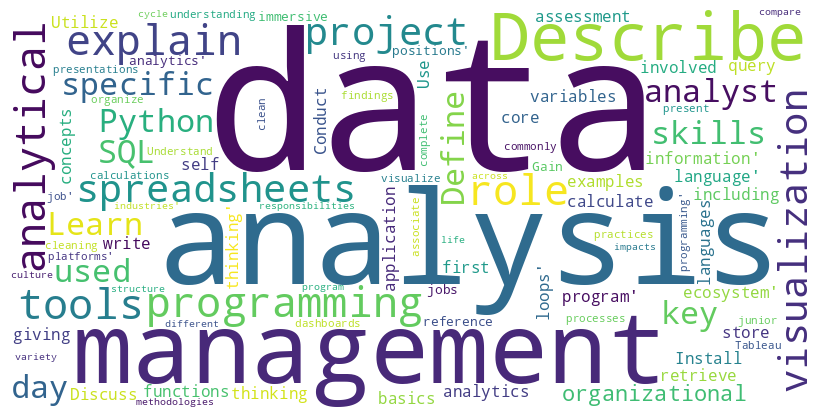

In [ ]:
# Assuming you have your DataFrame as coursera_courses_cleaned_df
top_courses = coursera_courses_cleaned_df[['course_title', 'course_students_enrolled', 'course_summary']].sort_values(by='course_students_enrolled', ascending=False).head(10)

# Combine all text in the course_summary column
all_summary_text = ' '.join(top_courses['course_summary'].astype(str))

# Create a word cloud for course_summary
wordcloud_summary = WordCloud(width = 800, height = 400,
                              background_color ='white',
                              min_font_size = 10).generate(all_summary_text)

# Plot the WordCloud for course_summary
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_summary)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Insights:** The word cloud strongly features "Data," "Analysis," "Management," "Python," and "Spreadsheets," emphasizing the demand for data analysis and management skills, with Python being a key tool.

**Takeaways:** Building expertise in data analysis and getting comfortable with tools like Python and spreadsheets are practical steps for those aiming to enhance their analytical and managerial capabilities in the modern workplace.

## Top 10 courses based on enrollment

In [ ]:
# Let's first check the cleaned data and then we can find the top 10 courses based on enrollment
coursera_courses_cleaned_df[['course_title', 'course_students_enrolled']].sort_values(by='course_students_enrolled', ascending=False).head(10)


,course_title,course_students_enrolled
942,The Science of Well-Being,4594817.0
647,Learning How to Learn: Powerful mental tools t...,3641053.0
800,Programming for Everybody (Getting Started wit...,2977587.0
293,Entrepreneurship 1: Developing the Opportunity,2248113.0
368,Fractal Data Science,2182786.0
428,Google Data Analytics,1847607.0
338,Financial Reporting,1713399.0
925,Technical Support Fundamentals,1619616.0
830,Python for Everybody,1560414.0
363,Foundations of Public Health Practice,1520400.0


## 80-20 rule : 240 courses (24% of total courses) have 80% enrollment

In [ ]:
# Calculate the total number of students enrolled across all courses
total_students = coursera_courses_cleaned_df['course_students_enrolled'].sum()

# Calculate the total number of students enrolled in the top 240 courses
top_courses_students = coursera_courses_cleaned_df['course_students_enrolled'].nlargest(240).sum()

# Calculate the percentage of students enrolled in the top 240 courses relative to the total
percentage_top_240 = (top_courses_students / total_students) * 100

# Calculate the total number of unique courses
total_unique_courses = coursera_courses_cleaned_df['course_title'].nunique()

total_students, top_courses_students, percentage_top_240, total_unique_courses

(137684690.0, 109192307.0, 79.30606300526225, 986)

## Conclusion:
After meticulously sifting through the Coursera dataset, my conclusion is both reflective and forward-looking. It's been an eye-opening experience to see how data can tell the story of our collective hunger for knowledge. Python, AI, and Data Science stand out not merely as subjects but as beacons of the future, with my analysis confirming their stronghold in the current educational narrative. As I wrap up this exploratory journey, it's clear that these fields are not just fleeting interests—they are the cornerstones upon which learners across the globe are building their dreams and careers. It's an era where being data-literate is as fundamental as being literate itself, and I'm excited to see how these insights will shape the educational strategies of tomorrow.